In [1]:
%run "../../PyUtils/common.ipynb"
import sklearn

<IPython.core.display.Javascript object>

In [2]:
df = LoadDataSet("./kuky.csv")
print(df)
df['previouspef'] = df.pefmax.shift(1)

     cname ampm timeofday dateofmeasure    pef1    pef2    pef3  pefmax indexpef      so2       co       o3      no2     pm10  temperaturec  rainfallmm  windspeedms  precipitationpercent  vaporpressurehpa  dewpointtemperaturec  airpressurehpa  sealevelpressurehpa  groundtemperaturec  winddirection   tmax     amax    pmax   tmin     amin   pmin  tmode    amode   pmode  tmaxlesstmin  amaxlessamin  pmaxlesspmin  so2max  so2maxtime   so2min  so2mintime  comax  comaxtime    comin  comintime  o3max  o3maxtime    o3min  o3mintime  no2max  no2maxtime   no2min  no2mintime  pm10max  pm10maxtime  pm10min  pm10mintime
0     kuky   am  07:10:00    2014-11-21 516.000 543.000 543.000 543.000        G -998.897 -986.400 -998.751 -998.398 1722.000         2.900         nan        1.300                95.000             7.100                 2.100        1019.800             1024.100               1.900        180.000 14.200 1022.600  97.000  0.900 1000.000 39.000  3.000 1019.800  97.000        13.300   

In [3]:
df.loc[df.timeofday == 'null', 'timeofday'] = "00:00:00"
datetime = df.dateofmeasure + " " + df.timeofday 
df.insert(0, 'datetime', datetime)
df.datetime = pd.to_datetime(df.datetime)

df.sort_values(by='datetime', ascending=True, inplace=True)

In [4]:
#toDrop  = "cname, ampm, timeofday, dateofmeasure, so2, co, o3, no2, pm10, so2poi, copoi, o3poi, no2poi, pm10poi, temperaturec, rainfallmm, windspeedms, precipitationpercent, vaporpressurehpa, dewpointtemperaturec, airpressurehpa, sealevelpressurehpa, groundtemperaturec, temperaturecpoi, rainfallmmpoi, windspeedmspoi, precipitationpercentpoi, vaporpressurehpapoi, dewpointtemperaturecpoi, airpressurehpapoi, sealevelpressurehpapoi, groundtemperaturecpoi, winddirection, winddirectionpoi, tmax, amax, pmax, tmin, amin, pmin, tmode, amode, pmode, tmaxlesstmin, amaxlessamin, pmaxlesspmin, tmaxpoi, amaxpoi, pmaxpoi, tminpoi, aminpoi, pminpoi, tmodepoi, amodepoi, pmodepoi, tmaxlesstminpoi, amaxlessaminpoi, pmaxlesspminpoi, so2max, so2maxtime, so2min, so2mintime, comax, comaxtime, comin, comintime, o3max, o3maxtime, o3min, o3mintime, no2max, no2maxtime, no2min, no2mintime, pm10max, pm10maxtime, pm10min, pm10mintime, so2maxpoi, so2maxtimepoi, so2minpoi, so2mintimepoi, comaxpoi, comaxtimepoi, cominpoi, comintimepoi, o3maxpoi, o3maxtimepoi, o3minpoi, o3mintimepoi, no2maxpoi, no2maxtimepoi, no2minpoi, no2mintimepoi, pm10maxpoi, pm10maxtimepoi, pm10minpoi, pm10mintimepoi".split(', ')
toDrop  = "cname, ampm, timeofday, dateofmeasure, datetime, pefmax, pef1, pef2, pef3".split(', ')
df=df.drop(toDrop, axis=1)
df=df.reset_index(drop=True)

In [5]:
df.dropna(inplace=True)
print(df)

     indexpef   so2     co    o3   no2     pm10  temperaturec  rainfallmm  windspeedms  precipitationpercent  vaporpressurehpa  dewpointtemperaturec  airpressurehpa  sealevelpressurehpa  groundtemperaturec  winddirection   tmax     amax    pmax   tmin     amin   pmin  tmode    amode   pmode  tmaxlesstmin  amaxlessamin  pmaxlesspmin  so2max  so2maxtime  so2min  so2mintime  comax  comaxtime  comin  comintime  o3max  o3maxtime  o3min  o3mintime  no2max  no2maxtime  no2min  no2mintime  pm10max  pm10maxtime  pm10min  pm10mintime  previouspef
20          G 0.072  8.100 0.240 0.454  782.000         9.200       0.100        1.800                98.000            11.300                 8.800        1005.300             1009.400               9.000        290.000 10.800 1016.300  99.000  6.200 1000.000 81.000  8.600 1005.400  88.000         4.600        16.300        18.000   0.003      21.000   0.003      21.000  0.500     21.000  0.300      2.000  0.021     20.000  0.004     21.000   0.026    

In [6]:
print(df.index.size)

151


      indexpef   so2     co    o3   no2     pm10  temperaturec  rainfallmm  windspeedms  precipitationpercent  vaporpressurehpa  dewpointtemperaturec  airpressurehpa  sealevelpressurehpa  groundtemperaturec  winddirection   tmax     amax    pmax   tmin     amin   pmin  tmode    amode   pmode  tmaxlesstmin  amaxlessamin  pmaxlesspmin  so2max  so2maxtime  so2min  so2mintime  comax  comaxtime  comin  comintime  o3max  o3maxtime  o3min  o3mintime  no2max  no2maxtime  no2min  no2mintime  pm10max  pm10maxtime  pm10min  pm10mintime  previouspef
20           0 0.072  8.100 0.240 0.454  782.000         9.200       0.100        1.800                98.000            11.300                 8.800        1005.300             1009.400               9.000        290.000 10.800 1016.300  99.000  6.200 1000.000 81.000  8.600 1005.400  88.000         4.600        16.300        18.000   0.003      21.000   0.003      21.000  0.500     21.000  0.300      2.000  0.021     20.000  0.004     21.000   0.026  

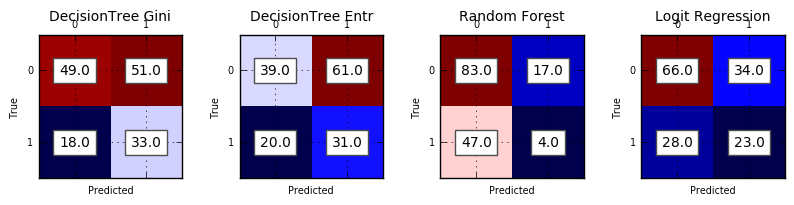

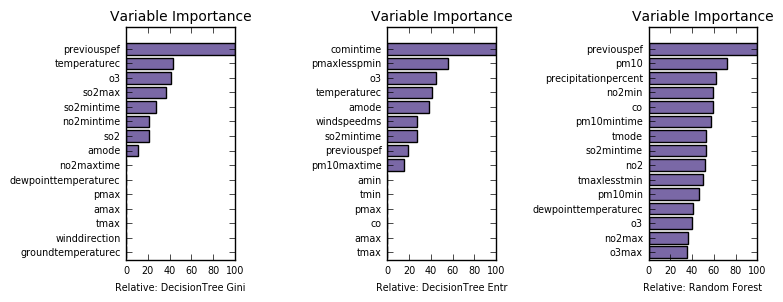

In [7]:
from sklearn.naive_bayes import GaussianNB
cls = [# Comment/uncomment out any classfiers according to your need 
       # DO NOT CHANGE
        "DecisionTree Gini" , tree.DecisionTreeClassifier(max_depth=4, criterion="gini", class_weight='balanced'),
        "DecisionTree Entr" , tree.DecisionTreeClassifier(max_depth=4, criterion="entropy", class_weight='balanced'), 
        #"SVM"               , sklearn.svm.SVC(), 
        "Random Forest"     , sklearn.ensemble.RandomForestClassifier(),
        #"K-NN"              , sklearn.neighbors.KNeighborsClassifier(),
        #"Gradient Boosting" , sklearn.ensemble.GradientBoostingClassifier(subsample=.85),
        "Logit Regression"  , sklearn.linear_model.LogisticRegression(class_weight='balanced'),
        #"Naive Bayes"       , GaussianNB(),
];
predictColumn="indexpef"
df.replace(to_replace="am", value=0, inplace=True, limit=None, regex=False, method='pad', axis=1)
df.replace(to_replace="pm", value=1, inplace=True, limit=None, regex=False, method='pad', axis=1)
df.replace(to_replace="G", value=0, inplace=True, limit=None, regex=False, method='pad', axis=1)
df.replace(to_replace="Y", value=1, inplace=True, limit=None, regex=False, method='pad', axis=1)
df.replace(to_replace="R", value=2, inplace=True, limit=None, regex=False, method='pad', axis=1)
print(df)
y = df[predictColumn]
#y.drop(y.index[0],inplace=True)
X = df.drop(predictColumn, axis=1)
#X.drop(X.index[X.index.size-1],inplace=True)
(X1,y1,ra,cls, y_preds, clfs) = Classify(X,y, True, drawConfusionMatrix=True, classifiers=cls, scale=True)

In [137]:
#get_ipython().reset()
decisionTrees = []

for k in range( int (len(cls)/2)) :
    d = cls[k*2+1];
    if (str(type(d)).find('DecisionTreeClassifier') > 0):
        decisionTrees.append(cls[k*2])
        decisionTrees.append(cls[k*2+1])

d = DrawDecisionTree(X,y, decisionTrees, class_names);

NameError: name 'class_names' is not defined